In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import itertools
import time
import statsmodels.formula.api as sm

train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
train.head()

,Player,GP,GS,MIN,PTS,FGM,FGA,FGP,Three_Pmade,Three_PA,...,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF,NBA_PTS
0,Cade Cunningham,27,26,35.4,20.15,6.48,14.81,0.44,2.30,5.74,...,0.85,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48,17.41
1,Jalen Suggs,30,30,28.9,14.37,5.17,10.27,0.50,1.17,3.47,...,0.76,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60,11.75
2,Franz Wagner,28,26,31.8,12.46,4.43,9.29,0.48,1.25,3.64,...,0.84,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21,15.15
3,Davion Mitchell,30,30,32.4,14.00,5.27,10.30,0.51,2.10,4.70,...,0.64,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37,11.48
4,James Bouknight,15,14,31.6,18.73,6.53,14.60,0.45,1.47,5.00,...,0.78,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87,4.58


In [2]:
train.corr()['NBA_PTS'].sort_values(ascending=False)

NBA_PTS        1.000000
GS             0.433931
FTP            0.351406
GP             0.337517
MIN            0.323561
STL            0.318212
FGM            0.270299
Three_Pmade    0.260686
PTS            0.249359
Three_PA       0.245180
DEF            0.228423
FGP            0.200565
FGA            0.191621
Three_PP       0.118538
BLK            0.104205
TRB            0.101691
PF             0.090852
TOV            0.073663
FTM            0.053743
AST           -0.007441
FTA           -0.015898
OFF           -0.241982
Name: NBA_PTS, dtype: float64

In [3]:
#Sole Predictor Base Model
model1 = sm.ols(formula = 'NBA_PTS~GS', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     6.727
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0147
Time:                        18:34:55   Log-Likelihood:                -85.405
No. Observations:                  31   AIC:                             174.8
Df Residuals:                      29   BIC:                             177.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5538      2.429      0.228      0.821      -4.414       5.521
GS             0.2521      0.097      2.594      0.015       0.053       0.451
==============================================================================
Omnibus:                        3.915   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.692
Skew:                           0.704   Prob(JB):                        0.260
Kurtosis:                       3.315   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='GS', ylabel='NBA_PTS'>

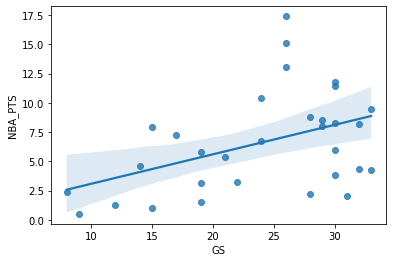

In [4]:
sns.regplot(x='GS',y='NBA_PTS', data=train)

In [5]:
preds1 = model1.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds1 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model1.mse_resid))

RMSE =  5.576177146620047 resid. standard error =  3.9329616080267082


Text(0, 0.5, 'Residuals')

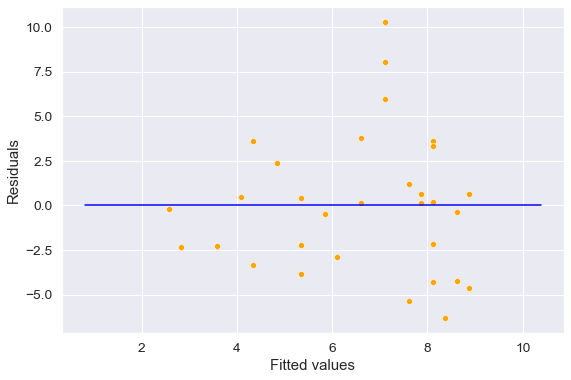

In [6]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model1.fittedvalues, y=model1.resid,color = 'orange')
sns.lineplot(x = [preds1.min(),preds1.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

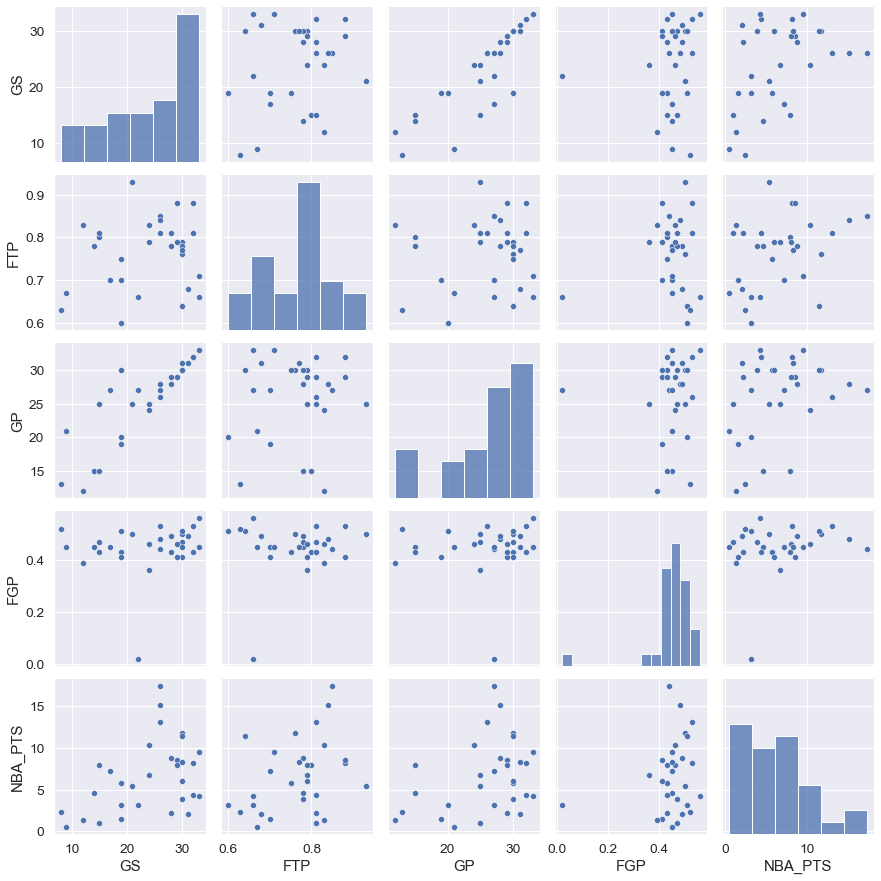

In [7]:
top4 = train[['GS','FTP','GP','FGP','NBA_PTS']]
sns.pairplot(top4)

In [8]:
#Model 2 MLR
model2 = sm.ols(formula = 'np.log(NBA_PTS)~GS+GP+FTP+FGP+I(GS**2)+I(GP**2)+I(FGP**2)', data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(NBA_PTS)   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     3.256
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0149
Time:                        18:35:04   Log-Likelihood:                -27.736
No. Observations:                  31   AIC:                             71.47
Df Residuals:                      23   BIC:                             82.94
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2269      2.298     -0.969      0.343      -6.980       2.526
GS              0.4347      0.174      2.502      0.020       0.075       0.794
GP             -0.2512      0.256     -0.982      0.336      -0.781       0.278
FTP             1.6106      1.815      0.887      0.384      -2.144       5.365
FGP            -1.7620      4.972     -0.354      0.726     -12.047       8.523
I(GS ** 2)     -0.0086      0.004     -2.040      0.053      -0.017       0.000
I(GP ** 2)      0.0051      0.006      0.864      0.397      -0.007       0.017
I(FGP ** 2)     6.1480      7.994      0.769      0.450     -10.389      22.685
==============================================================================
Omnibus:                        2.965   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.201
Skew:                          -0.492   Prob(JB):                        0.333
Kurtosis:                       2.143   Cond. No.                     7.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Model 2 RMSE
preds2 = model2.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds2 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model2.mse_resid))

RMSE =  7.315852743977371 resid. standard error =  0.6872999485748477


Text(0, 0.5, 'Residuals')

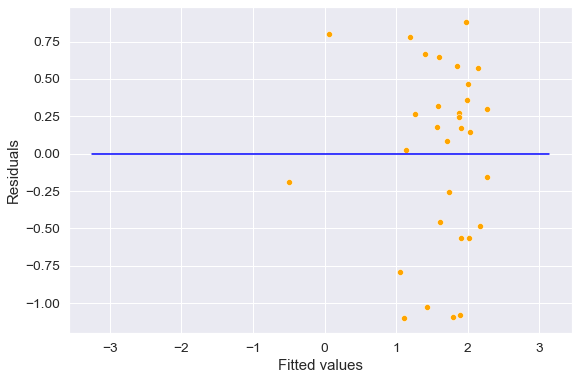

In [10]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [preds2.min(),preds2.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [11]:
out = model2.outlier_test()
out

,student_resid,unadj_p,bonf(p)
0,1.370350,0.184400,1.0
1,0.691606,0.496419,1.0
2,0.869039,0.394208,1.0
3,0.944851,0.354997,1.0
4,0.411635,0.684590,1.0
5,0.406532,0.688279,1.0
6,0.490252,0.628809,1.0
7,-0.407735,0.687409,1.0
8,-0.267478,0.791593,1.0
9,-0.850743,0.404077,1.0


In [12]:
#Number of points with absolute studentized residuals greater than 3
np.sum((np.abs(out.student_resid)>3))

0

In [13]:
#VIF table
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = train[['GP', 'GS', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP',
       'Three_Pmade', 'Three_PA', 'Three_PP', 'FTM', 'FTA', 'FTP', 'OFF', 'DEF', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

        feature            VIF
0         const    7000.423268
1            GP      20.083972
2            GS      23.234466
3           MIN       6.037726
4           PTS  827331.647491
5           FGM  340627.783339
6           FGA      45.769487
7           FGP       3.577571
8   Three_Pmade   38286.151199
9      Three_PA     211.000661
10     Three_PP      26.252128
11          FTM  132291.654673
12          FTA    1046.665568
13          FTP      19.004792
14          OFF   15421.227792
15          DEF   76838.703986
16          TRB  108041.954824
17          AST       4.792313
18          STL       2.720425
19          BLK       4.065562
20          TOV       7.225330
21           PF       4.639271


In [14]:
#Forward Stepwise Selection
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['GP', 'GS', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'Three_Pmade',
       'Three_PA', 'Three_PP', 'FTM', 'FTA', 'FTP', 'OFF', 'DEF', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('NBA_PTS~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [15]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [16]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 0.09955501556396484 seconds.
Processed  20 models on 2 predictors in 0.10802316665649414 seconds.
Processed  19 models on 3 predictors in 0.13575291633605957 seconds.
Processed  18 models on 4 predictors in 0.13803529739379883 seconds.
Processed  17 models on 5 predictors in 0.15566515922546387 seconds.
Processed  16 models on 6 predictors in 0.16713809967041016 seconds.
Processed  15 models on 7 predictors in 0.16513299942016602 seconds.
Processed  14 models on 8 predictors in 0.1728808879852295 seconds.
Processed  13 models on 9 predictors in 0.19930076599121094 seconds.
Processed  12 models on 10 predictors in 0.1609029769897461 seconds.
Processed  11 models on 11 predictors in 0.2586698532104492 seconds.
Processed  10 models on 12 predictors in 0.16962194442749023 seconds.
Processed  9 models on 13 predictors in 0.1709301471710205 seconds.
Processed  8 models on 14 predictors in 0.14880919456481934 seconds.
Processed  7 models on 15 predictor

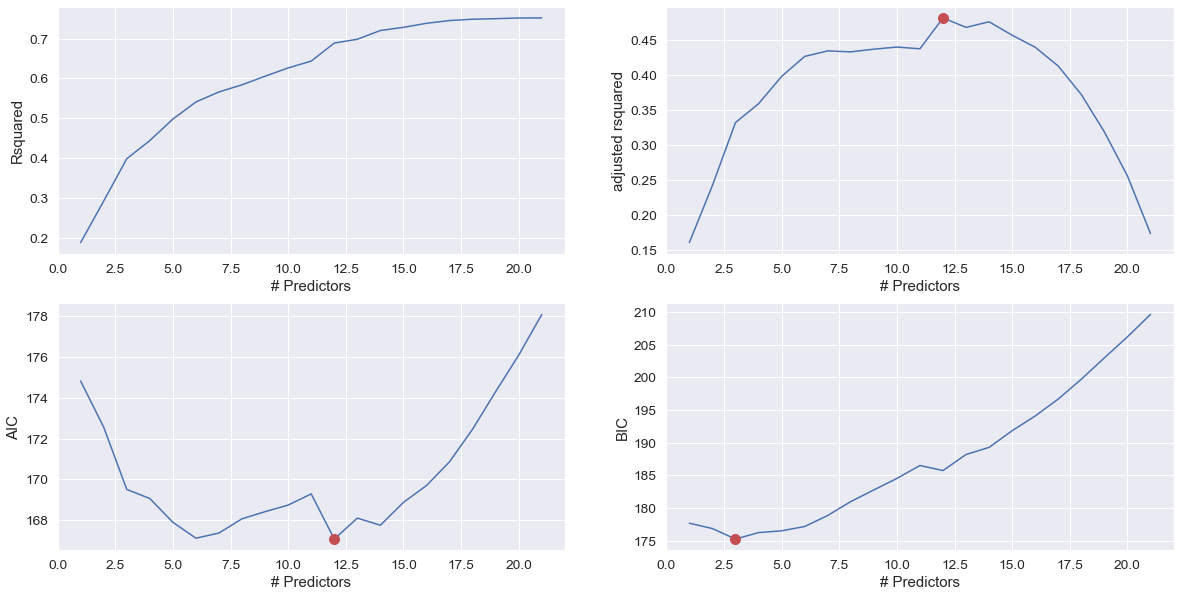

In [17]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [44]:
best_fwd_reg_model = models_best['model'][12]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3.320
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0108
Time:                        18:40:39   Log-Likelihood:                -70.544
No. Observations:                  31   AIC:                             167.1
Df Residuals:                      18   BIC:                             185.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -25.1311      9.068     -2.771      0.013     -44.183      -6.079
GS              0.4274      0.118      3.636      0.002       0.180       0.674
OFF            -4.3519      1.786     -2.437      0.025      -8.104      -0.599
BLK             4.3527      2.476      1.758      0.096      -0.849       9.555
FTP            16.7223     10.021      1.669      0.112      -4.331      37.775
TOV             2.7456      1.281      2.144      0.046       0.055       5.436
AST            -0.9501      0.530     -1.794      0.090      -2.063       0.163
FGP            15.1458      8.288      1.828      0.084      -2.266      32.557
TRB             0.6107      0.608      1.004      0.329      -0.668       1.889
STL             1.3310      2.095      0.635      0.533      -3.070       5.732
Three_Pmade    -7.6044      3.766     -2.019      0.059     -15.518       0.309
Three_PA        2.8097      1.614      1.741      0.099      -0.580       6.200
FTA            -0.9545      0.590     -1.617      0.123      -2.195       0.285
==============================================================================
Omnibus:                        3.738   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.265
Skew:                          -0.565   Prob(JB):                        0.322
Kurtosis:                       3.691   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Forward Stepwise RMSE
preds4 = best_fwd_reg_model.predict(test)
print('RMSE = ', np.sqrt(((preds4 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(best_fwd_reg_model.mse_resid))

RMSE =  6.235384766707949 resid. standard error =  3.5084862764393536


In [73]:
# Creating a dataframe that will consist of all combinations of polynomial transformations of the 
# predictors to be considered for interactions

predictor_set = ['GS', 'OFF', 'TOV']
from itertools import product
values = np.arange(0,3)
polynomial_transformations = pd.DataFrame(product(values, repeat=3), columns=predictor_set).loc[1:,]
polynomial_transformations.loc[:,'sum_degree'] = (polynomial_transformations).astype(int).sum(axis=1)
polynomial_transformations.loc[:,'count_zeros'] = (polynomial_transformations == 0).astype(int).sum(axis=1)
polynomial_transformations.sort_values(by = ['count_zeros', 'sum_degree'], ascending=[False, True], inplace=True)
polynomial_transformations.drop(columns = ['count_zeros'], inplace=True)
polynomial_transformations.reset_index(inplace = True, drop = True)

In [74]:
#Setting the seed as we are shuffling the data before splitting it into K-folds
np.random.seed(123)
# Shuffling the training set before creating K folds
train = train.sample(frac=1)
k = 5 #5-fold cross validation
fold_size = np.round(train.shape[0]/k)

In [75]:
def KFoldCV(selected_interactions, interaction_being_tested):
    array_new1 = [None]*k
    for i in range(k):
        dropped = np.arange(i*fold_size, (i+1)*fold_size)
        test_new = train.loc[dropped,:]
        train_new = train.drop(dropped)
        model = sm.ols('NBA_PTS~GS+OFF+TOV'+selected_interactions+interaction_being_tested, data = train_new).fit()
        pred = model.predict(test_new)
        array_new1[i] = np.sqrt(((test_new.NBA_PTS - pred)**2).mean())
    return np.mean(array_new1)# mean of array_new1

In [76]:
# This code implements the algorithm of systematically considering interactions of degree 2 and going upto 
# the interaction of degree 12. For a given degree 'd' the interactions are selected greedily based on 
# highest reduction in the 5-fold cross validation RMSE. Once no more reduction in the 5-fold cross validation
# RMSE is possible using interactions of degree 'd', interaction terms of the next higher degree 'd+1' are considered.

# 5-fold cross validation RMSE of the initial model with the 4 predictors of degree one
cv_previous_model = KFoldCV(selected_interactions = '', interaction_being_tested = '')
interaction_being_tested = '+'
selected_interactions = ''

# Considering interactions of degree 'd' = 2 to 12
for d in np.arange(2,13):
    
    # Selecting interaction terms of degree = 'd'
    degree_set = polynomial_transformations.loc[polynomial_transformations.sum_degree==d, :]
    
    # Initializing objects to store the interactions of degree 'd' that reduce the
    # 5-fold cross validation RMSEs as compared to the previous model
    interactions_that_reduce_KfoldCV = []; cv_degree = []; 
    
    # Creating another DataFrame that will consist of the updated set of interactions of degree 'd' to be considered
    # as interactions that do not reduce the 5-fold cross validation RMSE will be discarded
    degree_set_updated = pd.DataFrame(columns = degree_set.columns)
    
    # Continue adding interactions of degree 'd' in the model until no interactions reduce 
    # the 5-fold cross-validation RMSE
    while True:
        
        #Iterating over all possible interactions of degree 'd'
        for index, row in degree_set.iterrows():
            
            # Creating the formula expression for the interaction term to be tested
            for predictor in predictor_set:
                interaction_being_tested = interaction_being_tested + ('I('+predictor +'**' +\
                                         str(row[predictor]) + ')*' if row[predictor]>1 else\
                                               predictor + '*' if row[predictor]==1 else '')
            interaction_being_tested = interaction_being_tested[:-1]
            
            # Call the function 'KFoldCV' to find out the 5-fold cross validation error on adding the 
            # interaction term being tested to the model
            cv = KFoldCV(selected_interactions, interaction_being_tested)
            
            # If the interaction term being tested reduces the 5-fold cross validation RMSE as compared to the
            # previous model, then consider adding it to the model
            if cv<cv_previous_model:
                interactions_that_reduce_KfoldCV.append(interaction_being_tested)
                cv_degree.append(cv)
                degree_set_updated = pd.concat([degree_set_updated, row.to_frame().T])
            interaction_being_tested = '+'
        cv_data = pd.DataFrame({'interaction':interactions_that_reduce_KfoldCV, 'cv':cv_degree})
        
        # Sort the interaction terms that reduce the 5-fold cross valdiation RMSE based on their respective
        # 5-fold cross validation RMSE
        cv_data.sort_values(by = 'cv', inplace = True)
        
        # Break the loop if no interaction of degree 'd' reduces the 5-fold cross validation RMSE as
        # compared to the previous model
        if cv_data.shape[0]==0:
            break
            
        # Select the interaction that corresponds to the least 5-fold cross validation RMSE
        selected_interactions = selected_interactions + cv_data.iloc[0,0]
        cv_previous_model = cv_data.iloc[0,1]
        cv_degree = []; interactions_that_reduce_KfoldCV = []
        degree_set = degree_set_updated.copy()
        degree_set_updated = pd.DataFrame(columns = degree_set.columns)
        
        # Print the progress after each model update, i.e., after an interaction term is selected
        print("Degree of interactions being considered:",d, ", 5-fold CV RMSE:", cv_previous_model)

Degree of interactions being considered: 2 , 5-fold CV RMSE: 3.7429731771800534


In [77]:
selected_interactions

'+GS*TOV'

In [78]:
kfold_model = sm.ols(formula = 'NBA_PTS~GS+OFF+TOV+GS*TOV', data=train).fit()
kfold_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     4.300
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00839
Time:                        18:46:45   Log-Likelihood:                -80.768
No. Observations:                  31   AIC:                             171.5
Df Residuals:                      26   BIC:                             178.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7002      7.446      1.706      0.100      -2.604      28.005
GS            -0.2502      0.307     -0.815      0.422      -0.881       0.381
OFF           -2.3707      1.270     -1.866      0.073      -4.982       0.240
TOV           -4.4396      2.913     -1.524      0.140     -10.427       1.548
GS:TOV         0.2335      0.124      1.888      0.070      -0.021       0.488
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.550
Skew:                           0.219   Prob(JB):                        0.760
Kurtosis:                       3.483   Cond. No.                         779.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#K-fold Model RMSE
predsK = kfold_model.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((predsK - actuals)**2).mean()))

RMSE =  5.848066627524105
